This notebook illustrates the encapsulation of the blackbox solver.

# The Circle Problem of Apollonius

The circle problem of Apollonius has the following input/output specification:
Given three circles, find all circles that are tangent to the given circles.

## 1. The Polynomial Systems

Without loss of generality, we take the first circle to be the unit circle,
centered at (0, 0) and with radius 1.  The origin of the second circle lies
on the first coordinate axis, so its center has coordinates (c2x, 0) and
radius r2.  The third circle has center (c3x, c3y) and radius r3.
So there are five parameters in this problem: c2x, r2, c3x, c3y, and r3.
Values for the five parameters are defined by the first five equations.
The next three equations determine the center (x, y) and the radius r
of the circle which touches the three given circles.
The condition on the center of the touching circle is that its distance
to the center of the given circle is either the difference or the sum of
the radii of both circles.  So we arrive at eight polynomial systems.

The problem formulation is coded in the function `polynomials`.

In [1]:
def polynomials(c2x, r2, c3x, c3y, r3):
    """
    On input are the five parameters of the circle problem of Apollonius:
    c2x : the x-coordinate of the center of the second circle,
    r2 : the radius of the second circle,
    c3x : the x-coordinate of the center of the third circle,
    c3y : the y-coordinate of the center of the third circle,
    r3 : the radius of the third circle.
    Returns a list of lists.  Each list contains a polynomial system.
    Solutions to each polynomial system define center (x, y) and radius r
    of a circle touching three given circles.
    """
    e1m = 'x^2 + y^2 - (r-1)^2;'
    e1p = 'x^2 + y^2 - (r+1)^2;'
    e2m = '(x-%.15f)^2 + y^2 - (r-%.15f)^2;' % (c2x, r2)
    e2p = '(x-%.15f)^2 + y^2 - (r+%.15f)^2;' % (c2x, r2)
    e3m = '(x-%.15f)^2 + (y-%.15f)^2 - (r-%.15f)^2;' % (c3x, c3y, r3)
    e3p = '(x-%.15f)^2 + (y-%.15f)^2 - (r+%.15f)^2;' % (c3x, c3y, r3)
    eqs0 = [e1m,e2m,e3m]
    eqs1 = [e1m,e2m,e3p]
    eqs2 = [e1m,e2p,e3m]
    eqs3 = [e1m,e2p,e3p]
    eqs4 = [e1p,e2m,e3m]
    eqs5 = [e1p,e2m,e3p]
    eqs6 = [e1p,e2p,e3m]
    eqs7 = [e1p,e2p,e3p]
    return [eqs0,eqs1,eqs2,eqs3,eqs4,eqs5,eqs6,eqs7]

As an example of a general problem, the center of the second circle is at `(2, 0)`, with radius `2/3`, and the third circle is centered at `(1, 1)`, with a radius of `1/3`.

Let us look at the eight polynomial systems, computed as the output of the function `polynomials`.

In [2]:
general_problem = polynomials(2, 2.0/3, 1, 1, 1.0/3)
for pols in general_problem:
    print(pols)

['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r-0.333333333333333)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r+0.333333333333333)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r+0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r-0.333333333333333)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r+0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r+0.333333333333333)^2;']
['x^2 + y^2 - (r+1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r-0.333333333333333)^2;']
['x^2 + y^2 - (r+1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;', '(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r+0.333333333333333)^2;']
['x^2 + y^

## 2. Plotting Circles

The package `matplotlib` has primitives to define circles.

In [3]:
import matplotlib.pyplot as plt

The input to the three given circles of the general problem is codified in the list of tuples set below.

In [4]:
crcdata = [((0, 0), 1), ((2, 0), 2.0/3), ((1, 1), 1.0/3)]

The input circles will be shown as blue disks.

Let us then render our general configuration.

In [5]:
plt.ion()

In [6]:
(xa, xb, ya, yb) = (-2, 4, -2, 3)

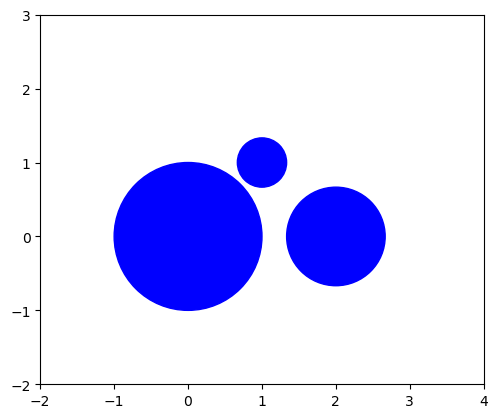

In [7]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect='equal')
for (center, radius) in crcdata:
    crc = plt.Circle(center, radius, edgecolor='blue', facecolor='blue')
    axs.add_patch(crc)
plt.axis([xa, xb, ya, yb])
fig.canvas.draw()

## 3. Solving Polynomial Systems

To solve the polynomial systems, we apply the blackbox solver.

In [8]:
from phcpy.solver import solve

PHCv2.4.88 released 2023-12-26 works!


and we need some functions to extract the real solutions.

In [9]:
from phcpy.solutions import strsol2dict, is_real

The `solve4circles` calls the solver on the polynomial systems of the problem.

In [10]:
def solve4circles(syst, verbose=True):
    """
    Given in syst is a list of polynomial systems.
    Returns a list of tuples.  Each tuple in the list of return
    consists of the coordinates of the center and the radius of
    a circle touching the three given circles.
    """
    (circle, eqscnt) = (0, 0)
    result = []
    for eqs in syst:
        eqscnt = eqscnt + 1
        if verbose:
            print('solving system', eqscnt, ':')
            for pol in eqs:
                print(pol)
        sols = solve(eqs)
        if verbose:
            print('system', eqscnt, 'has', len(sols), 'solutions')
        for sol in sols:
            if is_real(sol, 1.0e-8):
                soldic = strsol2dict(sol)
                if soldic['r'].real > 0:
                    circle = circle + 1
                    ctr = (soldic['x'].real, soldic['y'].real)
                    rad = soldic['r'].real
                    result.append((ctr, rad))
                    if verbose:
                        print('solution circle', circle)
                        print('center =', ctr)
                        print('radius =', rad)
    return result

The function `solve4circles` puts the solutions of the polynomial system in the format of our problem.  Each solution is a circle, represented by a tuple of the coordinates of the center and the radius of the circle.

In [11]:
sols = solve4circles(general_problem)

solving system 1 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;
(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r-0.333333333333333)^2;
system 1 has 2 solutions
solution circle 1
center = (0.792160611810177, -0.734629275680581)
radius = 2.08036966247227
solving system 2 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r-0.666666666666667)^2;
(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r+0.333333333333333)^2;
system 2 has 2 solutions
solving system 3 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r+0.666666666666667)^2;
(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r-0.333333333333333)^2;
system 3 has 2 solutions
solution circle 2
center = (-0.200806137165906, 0.573494560766515)
radius = 1.60763403126575
solving system 4 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r+0.666666666666667)^2;
(x-1.000000000000000)^2 + (y-1.000000000000000)^2 - (r+0.333333333333333)^2;
system 4 has 2 solutions
solution circle 3


For all clarity, let us print the solution circles.

In [12]:
for (idx, circle) in enumerate(sols):
    print('Circle', idx+1, ':', circle)

Circle 1 : ((0.792160611810177, -0.734629275680581), 2.08036966247227)
Circle 2 : ((-0.200806137165906, 0.573494560766515), 1.60763403126575)
Circle 3 : ((-0.0193166119185707, -0.389367744928919), 1.38984660096895)
Circle 4 : ((5.35264994525186, 2.83381218937333), 5.05651326763556)
Circle 5 : ((1.86747280383257, 0.159838772566819), 0.874300697932419)
Circle 6 : ((1.23373094922213, 0.96944997788827), 0.56905236199947)
Circle 7 : ((1.43293571744453, 2.36388335544507), 1.76428097133387)
Circle 8 : ((1.1821983625488, 0.435483976535281), 0.25985684195945)


Observe that we have a constellation where all eight touching circles have real coordinates as centers and a positive radius.

The given circles are plotted as blue disks,
while the eight solution circles are plotted in red.

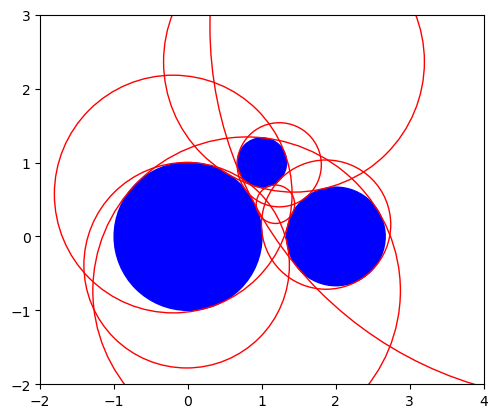

In [13]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect='equal')
for (center, radius) in crcdata:
    crc = plt.Circle(center, radius, edgecolor='blue', facecolor='blue')
    axs.add_patch(crc)
for (center, radius) in sols:
    crc = plt.Circle(center, radius, edgecolor='red', facecolor='none')
    axs.add_patch(crc)
plt.axis([xa, xb, ya, yb])
fig.canvas.draw()

## 4. A Special Problem

In a special configuration of three circles,
the three circles are mutually touching each other.

In [14]:
from math import sqrt
height = sqrt(3)
height

1.7320508075688772

In [15]:
special_problem = polynomials(2, 1, 1, height, 1)
for pols in special_problem:
    print(pols)

['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r-1.000000000000000)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r+1.000000000000000)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r+1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r-1.000000000000000)^2;']
['x^2 + y^2 - (r-1)^2;', '(x-2.000000000000000)^2 + y^2 - (r+1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r+1.000000000000000)^2;']
['x^2 + y^2 - (r+1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r-1.000000000000000)^2;']
['x^2 + y^2 - (r+1)^2;', '(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;', '(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r+1.000000000000000)^2;']
['x^2 + y^

In [16]:
specialinput = [((0, 0), 1), ((2, 0), 1), ((1, height), 1)]

In [17]:
(xa, xb, ya, yb) = (-2, 4, -2, 4)

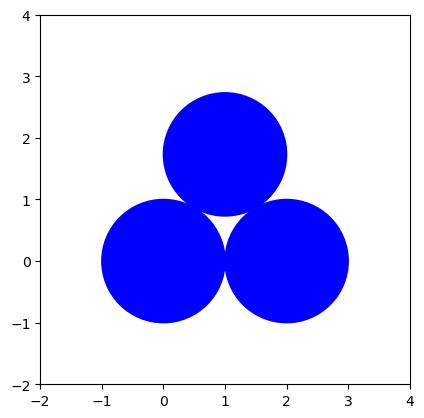

In [18]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect='equal')
for (center, radius) in specialinput:
    crc = plt.Circle(center, radius, edgecolor='blue', facecolor='blue')
    axs.add_patch(crc)
plt.axis([xa, xb, ya, yb])
fig.canvas.draw()

In [19]:
specialsols = solve4circles(special_problem)

solving system 1 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;
(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r-1.000000000000000)^2;
system 1 has 2 solutions
solution circle 1
center = (1.0, 0.577350269189626)
radius = 2.15470053837925
solving system 2 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r-1.000000000000000)^2;
(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r+1.000000000000000)^2;
system 2 has 1 solutions
solving system 3 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r+1.000000000000000)^2;
(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r-1.000000000000000)^2;
system 3 has 1 solutions
solving system 4 :
x^2 + y^2 - (r-1)^2;
(x-2.000000000000000)^2 + y^2 - (r+1.000000000000000)^2;
(x-1.000000000000000)^2 + (y-1.732050807568877)^2 - (r+1.000000000000000)^2;
system 4 has 1 solutions
solution circle 2
center = (1.42985881704912e-16, -7.69185074553603e-17)
radius = 1.0
solving system 5 :
x^2 + y^2 - (r+1)^2;


In [20]:
for (idx, circle) in enumerate(specialsols):
    print('Circle', idx+1, ':', circle)

Circle 1 : ((1.0, 0.577350269189626), 2.15470053837925)
Circle 2 : ((1.42985881704912e-16, -7.69185074553603e-17), 1.0)
Circle 3 : ((2.0, -7.69185074551702e-17), 1.0)
Circle 4 : ((1.0, 1.73205080756888), 0.999999999999999)
Circle 5 : ((1.0, 0.577350269189626), 0.154700538379251)


We have five solutions?  Not eight?

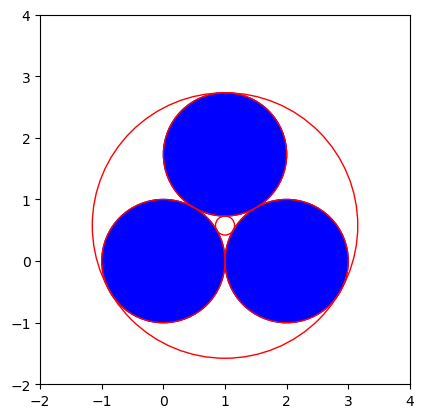

In [21]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect='equal')
for (center, radius) in specialinput:
    crc = plt.Circle(center, radius, edgecolor='blue', facecolor='blue')
    axs.add_patch(crc)
for (center, radius) in specialsols:
    crc = plt.Circle(center, radius, edgecolor='red', facecolor='none')
    axs.add_patch(crc)
plt.axis([xa, xb, ya, yb])
fig.canvas.draw()

The plot shows that the input circles are solutions as well.

## 5. A Perturbed Problem

Consider a small perturbation of a special configuration of three circles,
where the three circles are mutually touching each other.

In [22]:
perturbedinput = [((0, 0), 1), ((2.05, 0), 1), ((1.025, height+0.025), 1)]

In [23]:
perturbed_problem = polynomials(2.05, 1, 1.025, height+0.025, 1)
perturbedsols = solve4circles(perturbed_problem)

solving system 1 :
x^2 + y^2 - (r-1)^2;
(x-2.050000000000000)^2 + y^2 - (r-1.000000000000000)^2;
(x-1.025000000000000)^2 + (y-1.757050807568877)^2 - (r-1.000000000000000)^2;
system 1 has 2 solutions
solution circle 1
center = (1.025, 0.579551408418395)
radius = 2.17749939915048
solving system 2 :
x^2 + y^2 - (r-1)^2;
(x-2.050000000000000)^2 + y^2 - (r-1.000000000000000)^2;
(x-1.025000000000000)^2 + (y-1.757050807568877)^2 - (r+1.000000000000000)^2;
system 2 has 2 solutions
solving system 3 :
x^2 + y^2 - (r-1)^2;
(x-2.050000000000000)^2 + y^2 - (r+1.000000000000000)^2;
(x-1.025000000000000)^2 + (y-1.757050807568877)^2 - (r-1.000000000000000)^2;
system 3 has 2 solutions
solving system 4 :
x^2 + y^2 - (r-1)^2;
(x-2.050000000000000)^2 + y^2 - (r+1.000000000000000)^2;
(x-1.025000000000000)^2 + (y-1.757050807568877)^2 - (r+1.000000000000000)^2;
system 4 has 2 solutions
solution circle 2
center = (0.0248497799767382, -0.00390011791639839)
radius = 1.02515397552384
solution circle 3
center = (

In [24]:
for (idx, circle) in enumerate(perturbedsols):
    print('circle', idx+1, ':', circle)

circle 1 : ((1.025, 0.579551408418395), 2.17749939915048)
circle 2 : ((0.0248497799767382, -0.00390011791639839), 1.02515397552384)
circle 3 : ((-0.309008334843067, -0.198660887619915), 1.36735854321414)
circle 4 : ((2.35900833484305, -0.198660887619908), 1.36735854321413)
circle 5 : ((2.02515022002328, -0.00390011791640776), 1.02515397552386)
circle 6 : ((1.025, 2.04075732867108), 1.2837065211022)
circle 7 : ((1.025, 1.73870496299037), 1.01834584457851)
circle 8 : ((1.025, 0.579551408418395), 0.177499399150482)


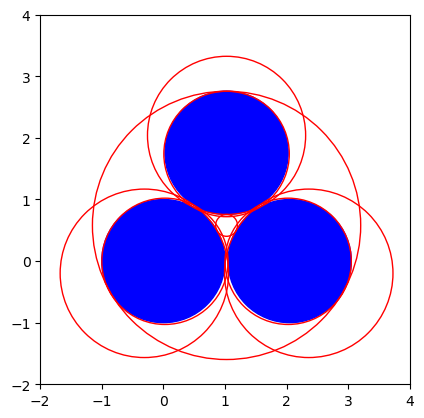

In [25]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect='equal')
for (center, radius) in perturbedinput:
    crc = plt.Circle(center, radius, edgecolor='blue', facecolor='blue')
    axs.add_patch(crc)
for (center, radius) in perturbedsols:
    crc = plt.Circle(center, radius, edgecolor='red', facecolor='none')
    axs.add_patch(crc)
plt.axis([xa, xb, ya, yb])
fig.canvas.draw()

The solution to the perturbed problem allows to account for the number five as the number of touching circles of the special problem: the original circles had to be counted twice, as their multiplicity equals two.  And so we thus have $3 \times 2 + 2 = 8$.